In [8]:
setwd("C:\\Users\\PC\\Desktop\\DACON\\COVID_19")

#데이터 가져오기
Case <- read.csv("Case.csv",fileEncoding = "UTF-8-BOM")
PatientInfo <- read.csv("PatientInfo.csv",fileEncoding = "UTF-8-BOM")
Policy <- read.csv("Policy.csv",fileEncoding = "UTF-8-BOM")
Region <- read.csv("Region.csv",fileEncoding = "UTF-8-BOM")
Time <- read.csv("Time.csv",fileEncoding = "UTF-8-BOM")
TimeAge <- read.csv("TimeAge.csv",fileEncoding = "UTF-8-BOM")
TimeGender <- read.csv("TimeGender.csv",fileEncoding = "UTF-8-BOM")
TimeProvince <- read.csv("TimeProvince.csv",fileEncoding = "UTF-8-BOM")

In [9]:
#라이브러리
library(dplyr)
library(ggplot2)

Adding missing grouping variables: `province`


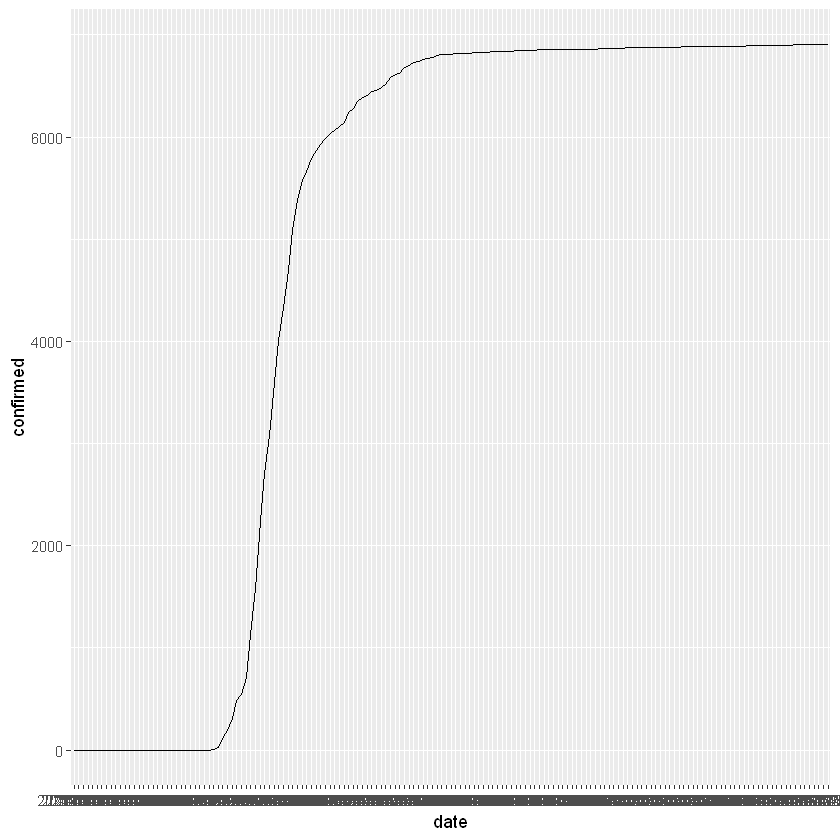

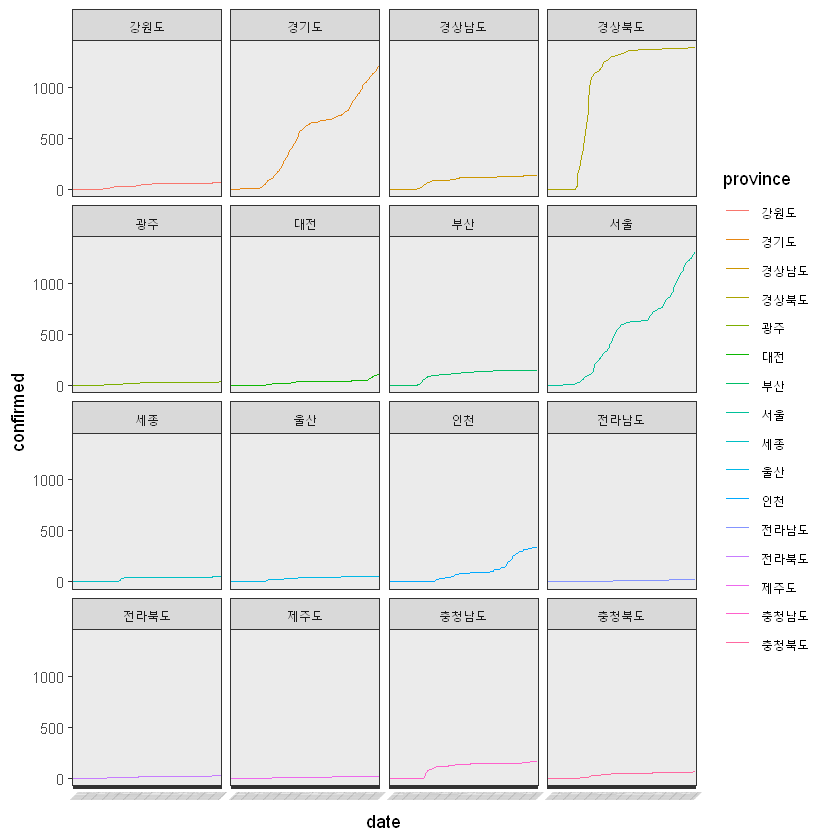

In [10]:
#지역별로 확진자 수 시각화
#대구는 최대값이 6000이라서 따로 그림.
data <- TimeProvince %>% filter(province == "대구") %>% select(date,confirmed,province)
ggplot(data,aes(x=date,y=confirmed,group=province)) + geom_line()

data <- TimeProvince %>% group_by(province) %>% select(date,confirmed) %>% data.frame()
data <- data[!(data$province == "대구"),]

ggplot(data,aes(x=date,y=confirmed,group=province,colour=province)) + geom_line() + 
  facet_wrap(~ province) + theme_bw() + theme(axis.text.x = element_text(size=1,angle=45))


In [11]:
#감염경로 top10
Case %>% group_by(infection_case) %>% summarise(top=n()) %>% arrange(desc(top)) %>% head(10)

`summarise()` ungrouping output (override with `.groups` argument)


infection_case,top
etc,17
overseas inflow,17
contact with patient,16
Shincheonji Church,15
Itaewon Clubs,9
Guro-gu Call Center,4
Richway,4
Cheongdo Daenam Hospital,3
Coupang Logistics Center,3
Door-to-door sales in Daejeon,3


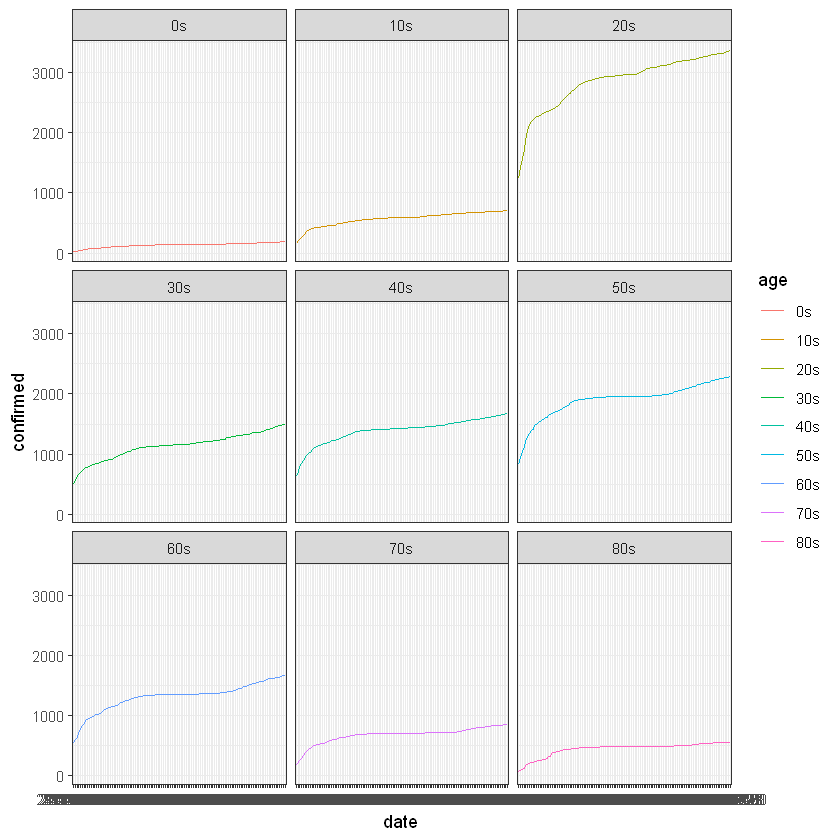

In [12]:
#연령별 확진자 수
data <- TimeAge %>% group_by(age) %>% data.frame()
ggplot(data,aes(x=date,y=confirmed,group=age,colour=age)) + geom_line() + 
  facet_wrap(~ age) + theme_bw()

`summarise()` ungrouping output (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)


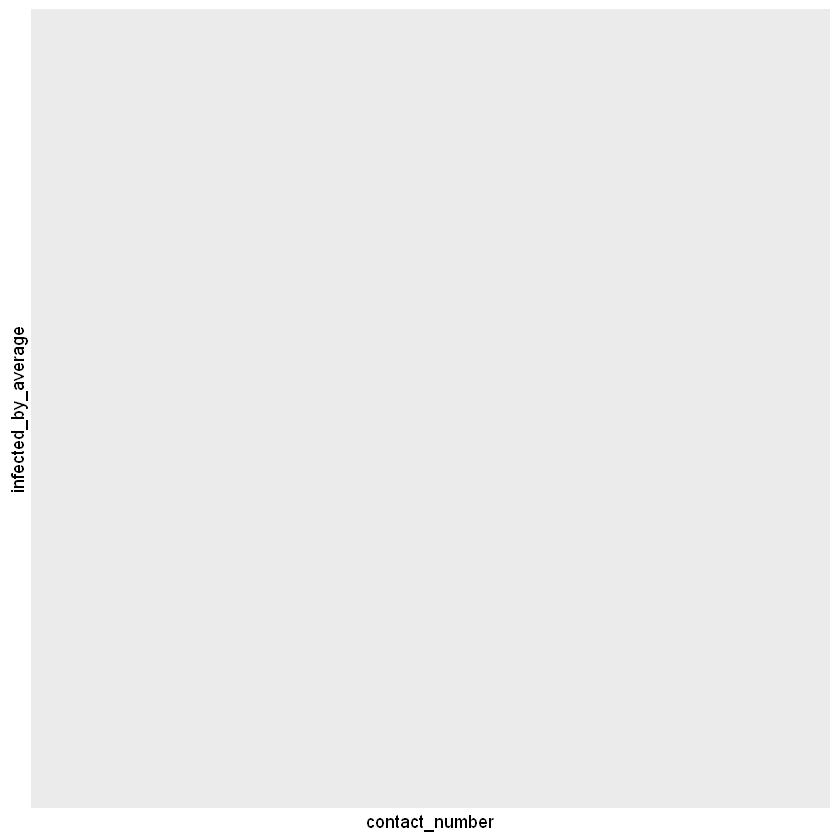

In [13]:
#접촉자,확진자 상관관계
Y <- PatientInfo %>% group_by(infected_by) %>% summarise(infected_by_sum=n()) %>% data.frame()
X <- data.frame(PatientInfo$patient_id,PatientInfo$contact_number)
colnames(X) <- c("infected_by","contact_number")
Y$infected_by <- as.numeric(Y$infected_by)
X$contact_number <- as.numeric(X$contact_number)

data <- merge(X,Y,key="infected_by")
data <- na.omit(data)
data <- data %>% group_by(contact_number) %>% summarise(infected_by_average=mean(infected_by_sum))
ggplot(data,aes(x=contact_number,y=infected_by_average)) + geom_line()


`summarise()` ungrouping output (override with `.groups` argument)
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


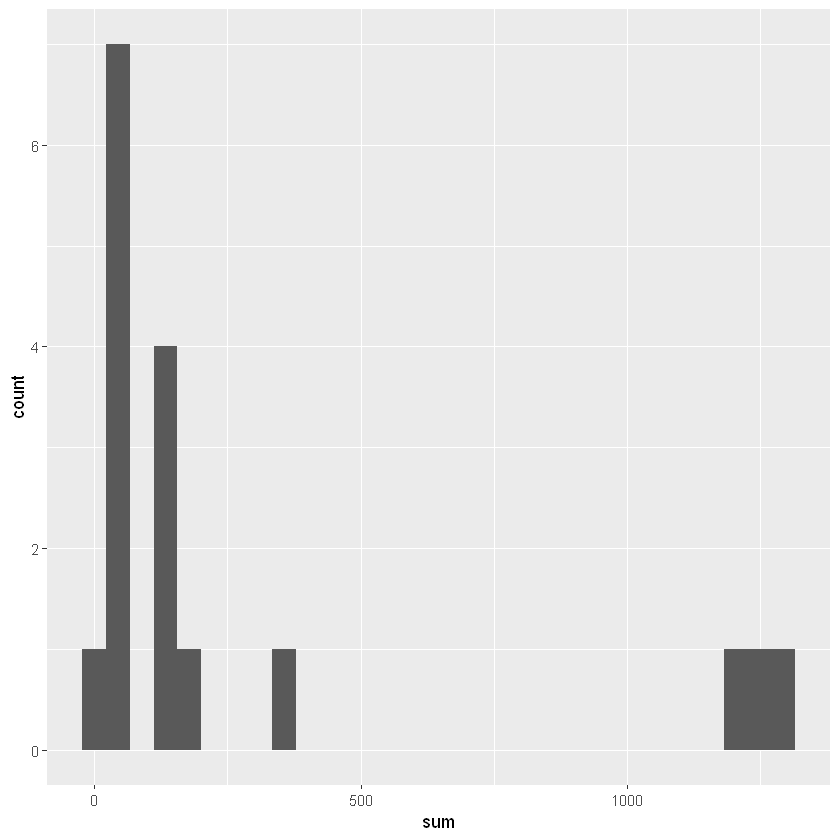

In [15]:
#지역별로 어디서 많이 감염됐는지 분석
PatientInfo$confirmed_date <- as.Date(PatientInfo$confirmed_date)
data <- PatientInfo %>% group_by(province) %>% summarise(sum=n())
ggplot(data,aes(x=sum)) + geom_histogram()


In [17]:
#지역별 감염 순위
PatientInfo$confirmed_date <- as.Date(PatientInfo$confirmed_date)
data3 <- PatientInfo %>% group_by(province) %>% summarise(sum=n()) %>% arrange(desc(sum)) %>% data.frame()

`summarise()` ungrouping output (override with `.groups` argument)


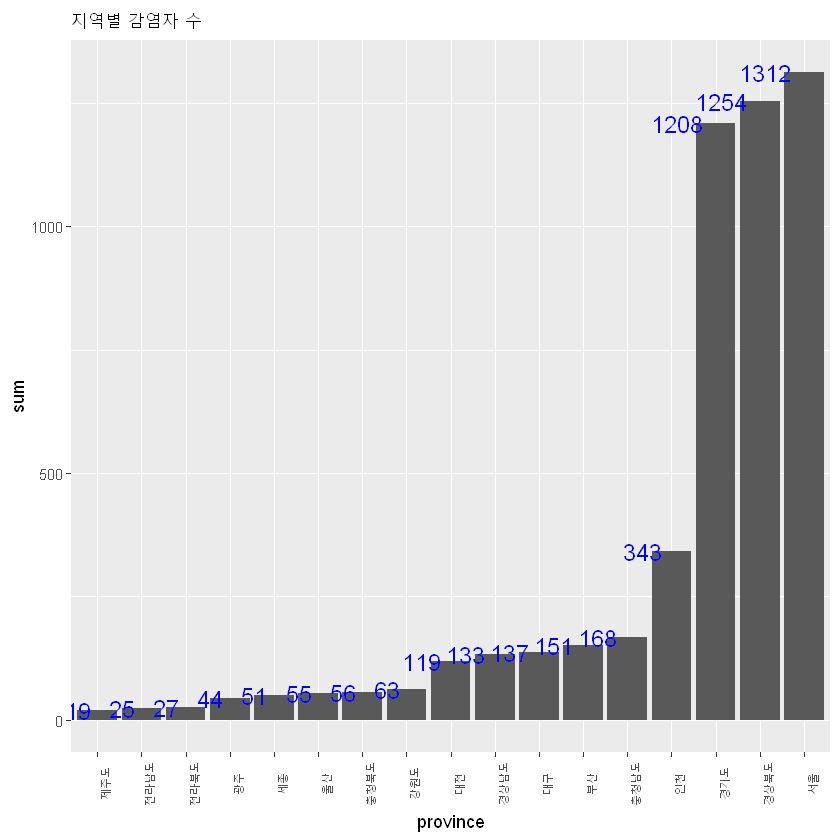

In [18]:
#세로그래프 버전
plot1 <- ggplot(data=data3, aes(x=reorder(province,sum),y=sum)) + 
  geom_bar(stat='identity') + 
  theme(axis.text.x = element_text(angle = 90)) +
  labs(x='province', y='sum',title='지역별 감염자 수') +
  geom_text(aes(label=sum), size=5, hjust=1.25, color='blue')
plot1

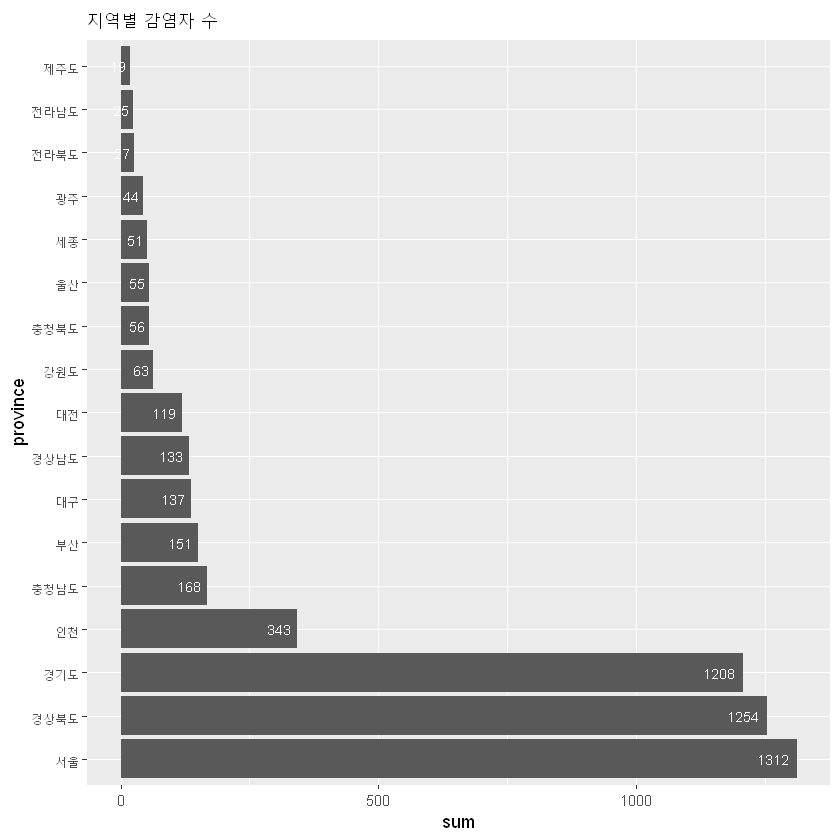

In [19]:
#가로그래프 버전
plot2 <- ggplot(data=data3, aes(x=reorder(province,-sum),y=sum)) + 
  geom_bar(stat='identity') + coord_flip() +labs(x='province', y='sum',title='지역별 감염자 수') + 
  geom_text(aes(label=sum), size=3, hjust=1.25, color='#FFFFFF')
plot2

Warning message in `==.default`(data3$province, top4):
"두 객체의 길이가 서로 배수관계에 있지 않습니다"Warning message in is.na(e1) | is.na(e2):
"두 객체의 길이가 서로 배수관계에 있지 않습니다"

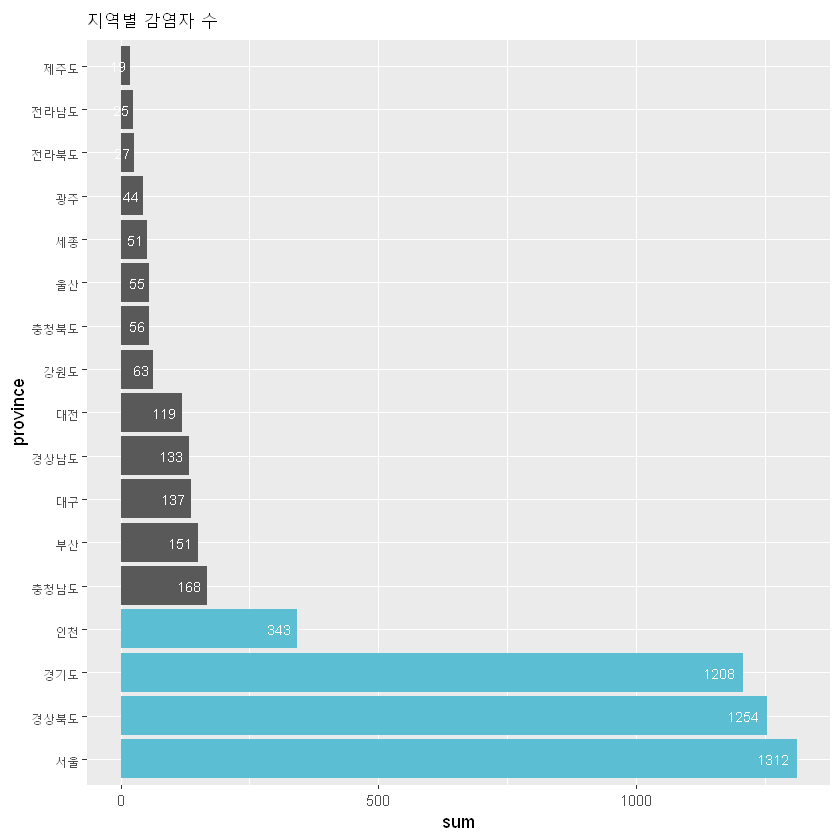

In [20]:
#가장 감염자 수가 많은 지역 4개를 그래프에 표시
top4 <- c('서울','경상북도','경기도','인천')
plot2 + geom_bar(data=data3[data3$province==top4, ], aes(x=province, y=sum), fill='#5CBED2', stat='identity') + 
  geom_text(aes(label=sum), size=3, hjust=1.25, color='#FFFFFF')

`summarise()` ungrouping output (override with `.groups` argument)


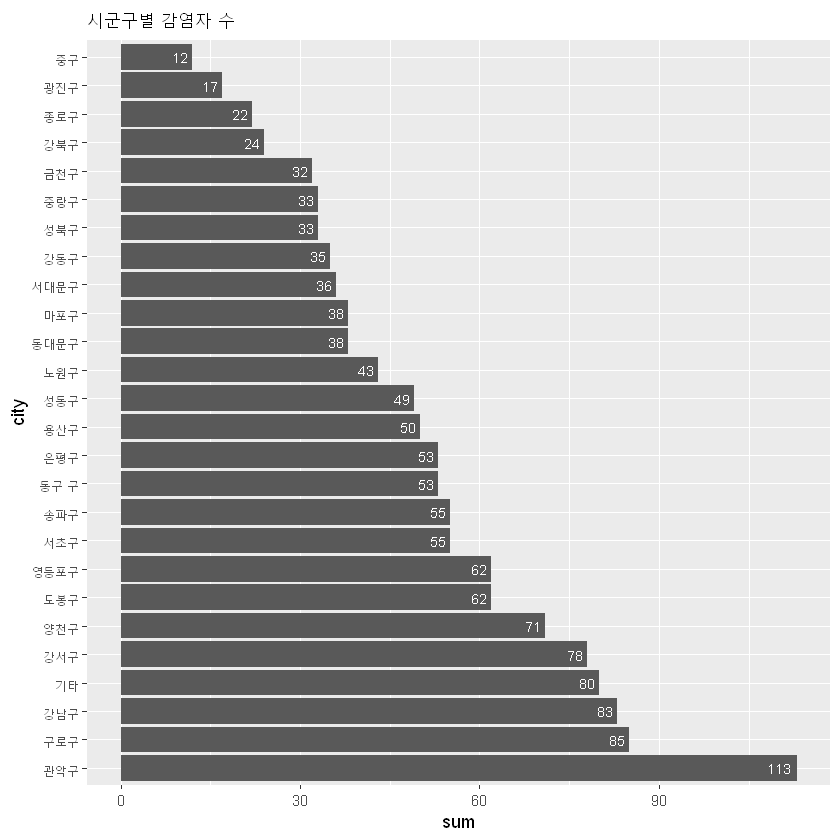

In [21]:
#서울시의 구별 감염자 수
top1 <- PatientInfo %>% filter(province==top4[1]) %>% group_by(city) %>% summarise(sum=n()) %>% data.frame()
top_plot1 <- ggplot(data=top1, aes(x=reorder(city,-sum),y=sum)) + 
  geom_bar(stat='identity') + coord_flip() +labs(x='city', y='sum',title='시군구별 감염자 수') + 
  geom_text(aes(label=sum), size=3, hjust=1.25, color='#FFFFFF')
top_plot1

`summarise()` ungrouping output (override with `.groups` argument)


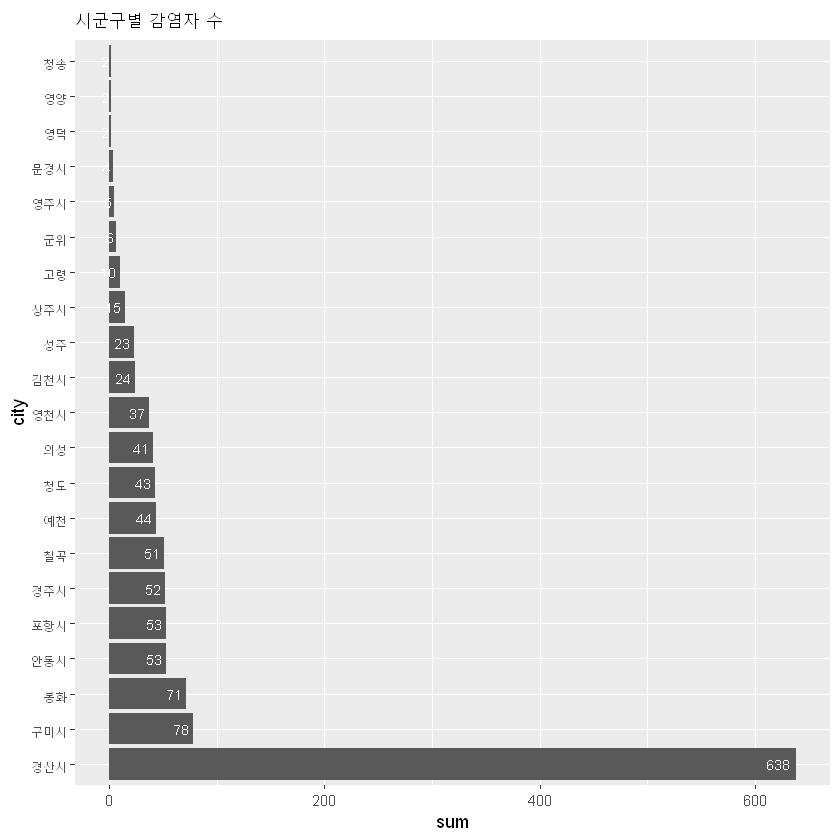

In [22]:
#경상북도의 시별 감염자 수
top2 <- PatientInfo %>% filter(province==top4[2]) %>% group_by(city) %>% summarise(sum=n()) %>% data.frame()
top_plot2 <- ggplot(data=top2, aes(x=reorder(city,-sum),y=sum)) + 
  geom_bar(stat='identity') + coord_flip() +labs(x='city', y='sum',title='시군구별 감염자 수') + 
  geom_text(aes(label=sum), size=3, hjust=1.25, color='#FFFFFF')
top_plot2


`summarise()` ungrouping output (override with `.groups` argument)


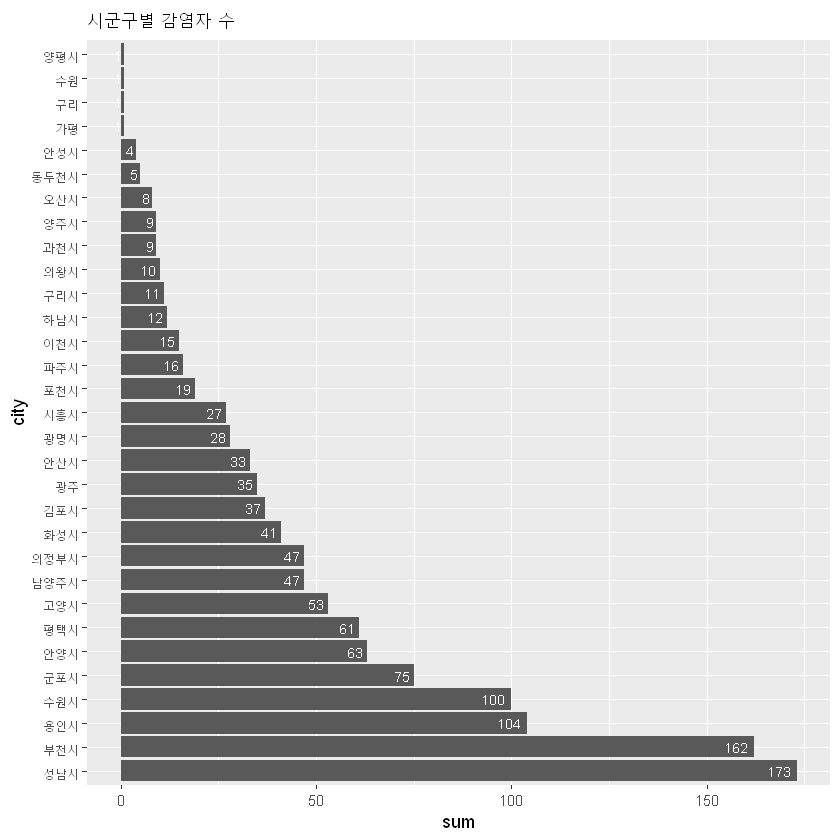

In [23]:
#경기도의 구별 감염자 수
top3 <- PatientInfo %>% filter(province==top4[3]) %>% group_by(city) %>% summarise(sum=n()) %>% data.frame()
top_plot3 <- ggplot(data=top3, aes(x=reorder(city,-sum),y=sum)) + 
  geom_bar(stat='identity') + coord_flip() +labs(x='city', y='sum',title='시군구별 감염자 수') + 
  geom_text(aes(label=sum), size=3, hjust=1.25, color='#FFFFFF')
top_plot3

`summarise()` ungrouping output (override with `.groups` argument)


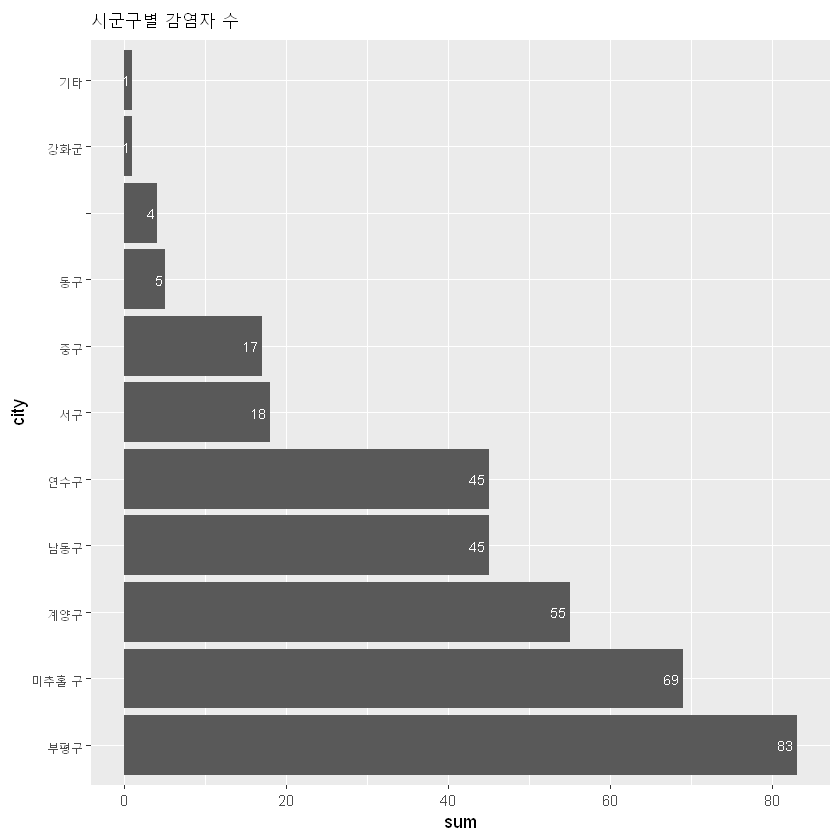

In [24]:
#인천의 구별 감염자 수
top4 <- PatientInfo %>% filter(province==top4[4]) %>% group_by(city) %>% summarise(sum=n()) %>% data.frame()
top_plot4 <- ggplot(data=top4, aes(x=reorder(city,-sum),y=sum)) + 
  geom_bar(stat='identity') + coord_flip() +labs(x='city', y='sum',title='시군구별 감염자 수') + 
  geom_text(aes(label=sum), size=3, hjust=1.25, color='#FFFFFF')
top_plot4
